# Robust Hybrid Models for Time Series Forecasting

# Temperature Dataset of Ngaoundere, Cameroon

## Overview
This repository contains hourly temperature data from Ngaoundere, a city in northern Cameroon, covering the period from October 1, 2023 to December 31, 2023 (2,208 observations). The data was collected from the Copernicus Climate Data Store.

## Importance
Temperature forecasting is particularly crucial for:
- **Solar energy optimization**: Photovoltaic panel performance is directly affected by ambient temperature variations
- **Energy management**: Enables better control of energy spending and resource allocation
- **Operational planning**: Helps businesses anticipate demand fluctuations and improve efficiency

## Key Applications
1. **Energy sector**: Optimizing solar power generation in extreme weather conditions
2. **Business operations**: Improving production scheduling and delivery logistics
3. **Economic planning**: Enhancing profitability through accurate demand forecasting

## Data Characteristics
- **Location**: Ngaoundere, northern Cameroon
- **Time period**: 3 months (October-December 2023)
- **Resolution**: Hourly measurements
- **Source**: Copernicus Climate Data Store (verified climate data)

## Potential Uses
- Developing temperature-dependent energy models
- Analyzing climate patterns in Central Africa
- Creating predictive models for business operations
- Researching renewable energy optimization


# Import the Necessary library

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed()
import time
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras import optimizers
import keras.backend as K
import sklearn
from sklearn.utils import check_array
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
import numpy as np
import tensorflow as tf
import numpy as np
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# pip install --upgrade keras

# 2. CLIMATE AREA

## Data: Temperature in NGAOUNDERE CITY


## About the Data


### Data comes from Copernicus climate Data Store

# (1.) Loading data to python

In [ ]:
ds1 = pd.read_csv("temperature_data.csv")
#ds1
# Extract the twelve last years

ds1['Time'] = pd.to_datetime(ds1['Time'])

ds2 = ds1[ds1['Time'].dt.year >= (max(ds1['Time'].dt.year) - 2)]

ds2['Temperature(C)'] = ds2['Temperature']-273
ds2.shape

(17520, 3)

In [ ]:
dtemp= ds2.iloc[15312:17520]
dtemp.head()

,Temperature,Time,Temperature(C)
15312,293.780521,2023-10-01 00:00:00,20.780521
15313,293.783503,2023-10-01 01:00:00,20.783503
15314,293.469790,2023-10-01 02:00:00,20.469790
15315,293.326055,2023-10-01 03:00:00,20.326055
15316,293.005185,2023-10-01 04:00:00,20.005185


In [ ]:
dtemp.shape

(2208, 3)

In [ ]:
dtemp.reset_index(drop=True, inplace=True)
dtemp.tail(5)

,Temperature,Time,Temperature(C)
2203,294.452678,2023-12-31 19:00:00,21.452678
2204,294.253477,2023-12-31 20:00:00,21.253477
2205,292.179153,2023-12-31 21:00:00,19.179153
2206,291.889893,2023-12-31 22:00:00,18.889893
2207,291.657888,2023-12-31 23:00:00,18.657888


In [ ]:
dtemp.isnull().sum()

,0
Temperature,0
Time,0
Temperature(C),0


In [ ]:
dtemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Temperature     2208 non-null   float64       
 1   Time            2208 non-null   datetime64[ns]
 2   Temperature(C)  2208 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 51.9 KB


In [ ]:
dtemp.describe().T

,count,mean,min,25%,50%,75%,max,std
Temperature,2208.0,295.752367,287.252187,292.392669,294.529317,299.208772,305.780942,4.30885
Time,2208,2023-11-15 23:30:00,2023-10-01 00:00:00,2023-10-23 23:45:00,2023-11-15 23:30:00,2023-12-08 23:15:00,2023-12-31 23:00:00,NaN
Temperature(C),2208.0,22.752367,14.252187,19.392669,21.529317,26.208772,32.780942,4.30885


## 2). Plotting the average of the long-term real interest rate on U.S

In this section we are going to evaluate the dynamic of the average of interest rate.

<ipython-input-12-5ca1a95b0251>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=13)


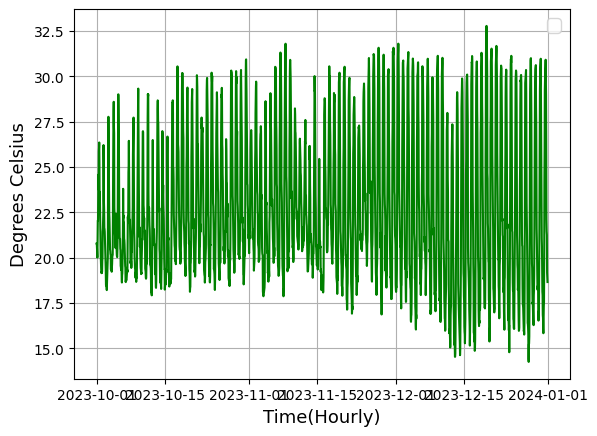

In [ ]:
import matplotlib.pyplot as plt

# Tracer les dates en fonction des moyennes
plt.plot(dtemp['Time'], dtemp['Temperature(C)'],  color='green')

# Ajouter des titres et des légendes
plt.xlabel('Time(Hourly)', fontsize=13)
plt.ylabel('Degrees Celsius', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# Afficher le graphique
plt.savefig('T.eps', format='eps', dpi=1000)
plt.show()


### Dataset consisting of only predictors (Features)


In [ ]:
dtemp_serie= dtemp[['Temperature(C)']]
dtemp_serie.head()

,Temperature(C)
0,20.780521
1,20.783503
2,20.469790
3,20.326055
4,20.005185


In [ ]:
# Calculer la taille de l'ensemble de test pour une année
test_size = int(len(dtemp_serie) * 0.1)  # 10% for the test data

# Extract the data corresponding to the last year for the test data

test = dtemp_serie[test_size:]
train_valid_size = len(dtemp_serie) - test_size
train_size = int(train_valid_size * 0.7)  # 70% for the training data
valid_size = train_valid_size - train_size  # The rest for the validation
print(train_size, valid_size, test_size)

1391 597 220


In [ ]:
train, valid, test = dtemp_serie[0:train_size], dtemp_serie[train_size:train_size+valid_size], dtemp_serie[train_size+valid_size:len(dtemp_serie)]

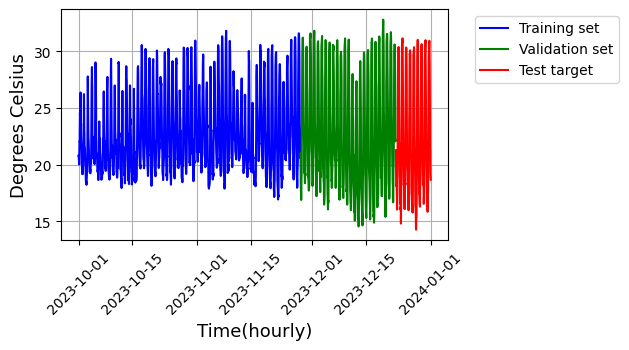

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.plot(dtemp['Time'][:train_size], train, label='Training set', color='blue')
plt.plot(dtemp['Time'][train_size:train_size + valid_size], valid, label='Validation set', color='green')
plt.plot(dtemp['Time'][train_size + valid_size:], test, label='Test target', color='red')

plt.xlabel('Time(hourly)', fontsize=13)
plt.ylabel('Degrees Celsius', fontsize=13)
plt.legend(fontsize=13)
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid()
plt.show()
plt.savefig('ST.eps', format='eps', dpi=1000)

## Normalizing the data

We will normalize our data to values between 0 and 1 using the python's MinMaxScaler function

In [ ]:
def normaliser(data,frange =(0,1)):

    scaler = MinMaxScaler(feature_range=frange)
    dt = data.values
    #dt = dt.reshape(-1,1)
    scaled = scaler.fit_transform(dt)
    return scaled, scaler

In [ ]:
scaler1 = MinMaxScaler(feature_range = (0,1))
scaler2 = MinMaxScaler(feature_range = (0,1))
normalised_average = scaler1.fit_transform(dtemp_serie.values)
normalised_average

array([[0.35233528],
       [0.35249622],
       [0.33556507],
       ...,
       [0.26590916],
       [0.25029774],
       [0.23777642]])

## (2.) Data setup for Input to Neural Networks

In [ ]:
def rnn_data_setup(data, lookback, delay, min_index, max_index):
    '''
    data:     Shape (n_samples,n_features). First column is the time series, other columns are the features.
    lookback: Number of time steps in the RNN >= 1
    delay:    The number of time steps or lookback to predict >= 1.
    min_index,max_index: The starting and ending indices of the time series portion to construct the data.
                         Allows constructing validation and test sets from the series in proper shape
    Returns: A tuple (x,y) of numpy arrays where x is in shape (n_samples,n_timesteps,n_features) and
             y is in shape (n_samples,delay). y is an array of target arrays each of size delay. To forecast
             a single value n timesteps ahead, set delay = n and take the last element of the forecast array.
    '''
    n_samples=(max_index+1)-min_index-(lookback-1)-delay
    samples = np.zeros((n_samples,lookback,data.shape[-1]))
    targets = np.zeros((n_samples,delay))

    samp, targ = [], []
    for i in range(n_samples):
        indices1 = range(i, i+lookback)
        indices2 = range(i + lookback, i + lookback + delay)
        samples[i] = data[indices1]
        targets[i,:] = data[indices2][0:delay][:,0]
        #print(samples,targets)
    samp.append(samples);targ.append(targets)

    return np.array(samp)[0],np.array(targ)[0]


In [ ]:
lookback = 50
delay = 1
min_index = 0
max_index = 2207


xdata, ydata = rnn_data_setup(normalised_average, lookback, delay, min_index, max_index)
print('The shape of the input sample set is:', xdata.shape)
print('The shape of the target set is:', ydata.shape)

The shape of the input sample set is: (2158, 50, 1)
The shape of the target set is: (2158, 1)


In [ ]:
normalised_average.shape

(2208, 1)

## Splitting the dataset into the training and testing sets


In [ ]:

test_size = int(len(dtemp_serie) * 0.1)  # 10% for the test data
# Extract the data corresponding to the last year for the test data
test = dtemp_serie[-test_size:]
train_valid_size = len(dtemp_serie) - test_size
train_size = int(train_valid_size * 0.7)  # 70% for the training data
valid_size = train_valid_size - train_size  # The rest for the validation
print(train_size, valid_size, test_size)


#Splitting the dataset into trainig, validation and testing.
xtrain, xvalid, xtest = xdata[0:train_size,:], xdata[train_size:train_size+valid_size,:], xdata[train_size+valid_size:len(xdata),:]
ytrain, yvalid, ytest = ydata[0:train_size,:], ydata[train_size:train_size+valid_size,:], ydata[train_size+valid_size:len(ydata),:]

print('The shape of the training sample is: ', xtrain.shape)
print('The shape of the validation sample is: ', xvalid.shape)
print('The shape of the testing sample is: ', xtest.shape)
print('The shape of the training target is: ', ytrain.shape)
print('The shape of the validation target is: ', yvalid.shape)
print('The shape of the testing target is: ', ytest.shape)


1391 597 220
The shape of the training sample is:  (1391, 50, 1)
The shape of the validation sample is:  (597, 50, 1)
The shape of the testing sample is:  (170, 50, 1)
The shape of the training target is:  (1391, 1)
The shape of the validation target is:  (597, 1)
The shape of the testing target is:  (170, 1)


# A-) LSTM Model

# OPTIMIZATION FUNCTIONS

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

model1 = Sequential()
model1.add(LSTM(15, activation='relu', input_shape=(lookback, 1), return_sequences=True))
model1.add(LSTM(15, return_sequences=True))
model1.add(Dropout(0.001))
model1.add(LSTM(15))
model1.add(Dense(1))
opt = Adam(learning_rate=0.003)  # Use learning_rate
model1.compile(loss='mse', optimizer=opt, metrics=["mae"])
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 15)              │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 15)              │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 15)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 15)                  │           1,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,756 (18.58 KB)

 Trainable params: 4,756 (18.58 KB)

 Non-trainable params: 0 (0.00 B)

## (i.) Fitting the model

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

In [ ]:
np.random.seed(1)
result1=model1.fit(xtrain,ytrain, validation_data=(xvalid,yvalid), epochs=100,callbacks=[early_stop], verbose=0)

Epoch 63: early stopping


In [ ]:
df = pd.DataFrame(result1.history)
df.tail()

,loss,mae,val_loss,val_mae
58,0.001860,0.032109,0.003802,0.045730
59,0.001872,0.032002,0.003721,0.045534
60,0.001828,0.031754,0.003541,0.043974
61,0.001860,0.032038,0.003766,0.045474
62,0.001847,0.031878,0.003557,0.044389


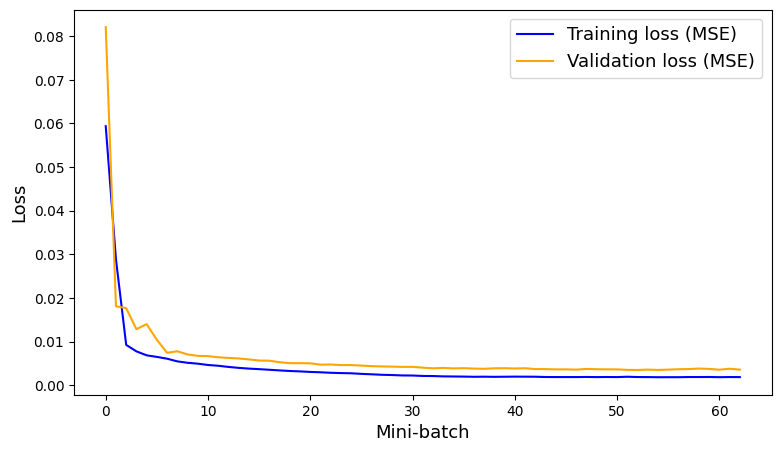

In [ ]:
print('')

plt.figure(figsize=(9,5))
plt.plot(df['loss'], label ='Training loss (MSE)', color = 'blue')
plt.plot(df['val_loss'], label='Validation loss (MSE)', color = 'orange')
plt.xlabel('Mini-batch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(fontsize=13)
plt.show()

## (ii.) Predictions

In [ ]:
preds1 = model1.predict(xtest)
preds1_r = preds1.reshape((-1, 1))  # Reshape preds1 to have one column

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


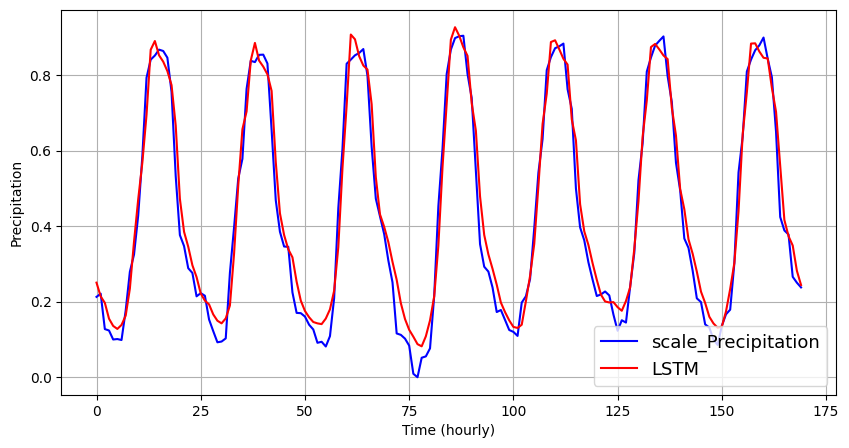

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ytest, label="scale_Precipitation", color = 'blue')
plt.plot(preds1_r, label="LSTM", color = 'red')
plt.xlabel('Time (hourly)')
plt.ylabel('Precipitation')
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [ ]:
real_pred1 = scaler1.inverse_transform(preds1_r)

In [ ]:
actuals1 = scaler1.inverse_transform(ytest)

### (iii.) Plot of Actual Interest rate

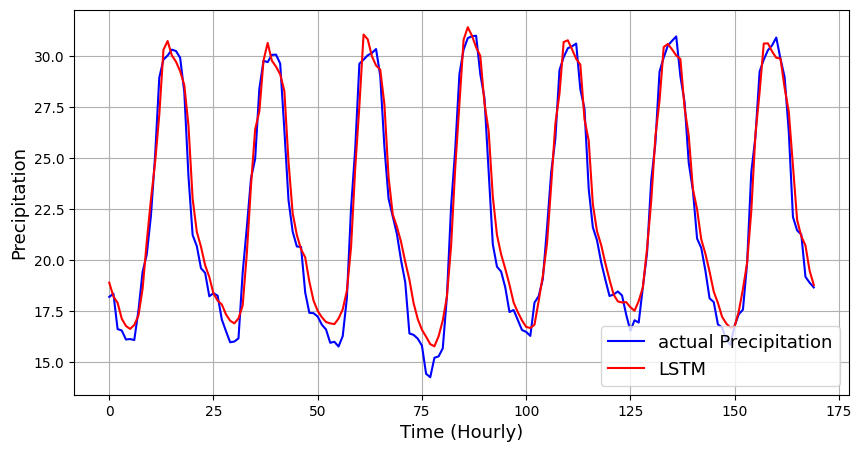

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals1, label="actual Precipitation", color = 'blue')
plt.plot(real_pred1, label="LSTM", color = 'red')
plt.xlabel('Time (Hourly)', fontsize=13)
plt.ylabel('Precipitation', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

 ### (iii.) Metrics Evaluation

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_pred)) * 100

In [ ]:
print("Test Data")


print('The the mean squared error committed by the LSTM model is ', mean_squared_error(actuals1,real_pred1))
print('The root mean squared error committed by the LSTM model is ', np.sqrt(mean_squared_error(actuals1,real_pred1)))
print('The the mean_absolute_percentage_error error committed by the  model is: ', mean_absolute_percentage_error(actuals1,real_pred1))
print('The the mean absolute error committed by the standard LSTM model is: ', mean_absolute_error(actuals1,real_pred1))

Test Data
The the mean squared error committed by the LSTM model is  1.01021690937761
The root mean squared error committed by the LSTM model is  1.0050954727674433
The the mean_absolute_percentage_error error committed by the  model is:  3.7879942829808866
The the mean absolute error committed by the standard LSTM model is:  0.8196346156149409


# b)  GRU Algorithm

### Define the model

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)


n_features = 1
lr = 0.00183       #Learning rate
#units = 30       #Number hidden units
batch_size=50


model3 = Sequential()
model3.add(keras.layers.GRU(70, activation='relu', input_shape=(lookback, n_features)))
model3.add(Dropout(0.001))
model3.add(Dense(1))
opt = keras.optimizers.Adam(lr)
model3.compile(optimizer = opt, loss='mse', metrics=["mae"])
model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 70)                  │          15,330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              71 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,401 (60.16 KB)

 Trainable params: 15,401 (60.16 KB)

 Non-trainable params: 0 (0.00 B)

## (i.) Fitting the model

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

In [ ]:
n_epochs = 100
valid_score = 0.2
start = time.time()
result3 = model3.fit(xtrain, ytrain, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)


Epoch 43: early stopping
> Compilation Time :  19.01365876197815


In [ ]:
df3 = pd.DataFrame(result3.history)
df3.tail()

,loss,mae,val_loss,val_mae
38,0.002391,0.035825,0.003028,0.039763
39,0.002389,0.035681,0.002998,0.039656
40,0.002446,0.036218,0.003012,0.039715
41,0.002406,0.035870,0.003040,0.039917
42,0.002421,0.035909,0.002996,0.039569


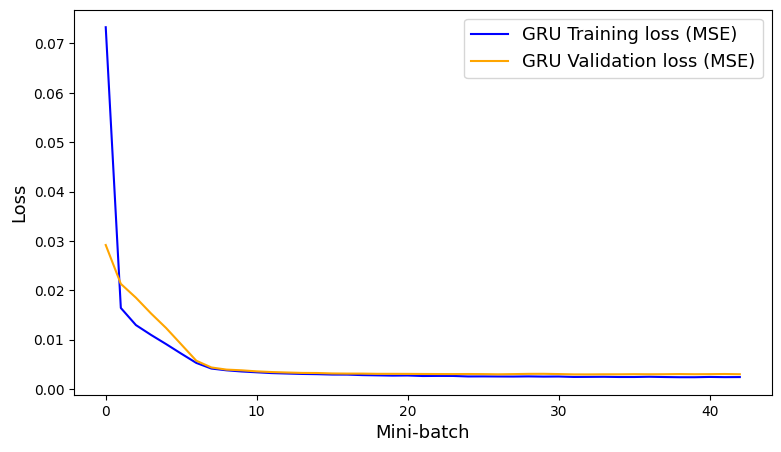

In [ ]:
print('')
plt.figure(figsize=(9,5))
plt.plot(df3['loss'], label ='GRU Training loss (MSE)', color = 'blue')
plt.plot(df3['val_loss'], label='GRU Validation loss (MSE)', color = 'orange')
plt.xlabel('Mini-batch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(fontsize=13)
# plt.savefig('GRU2_error.eps', format='eps', dpi=1000)
plt.show()

# Predictions

In [ ]:
preds3 = model3.predict(xtest)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


In [ ]:
ytest_r = ytest.reshape((-1, 1))  # Reshape ytest to have one column
preds3_r = preds3.reshape((-1, 1))  # Reshape preds1 to have one column

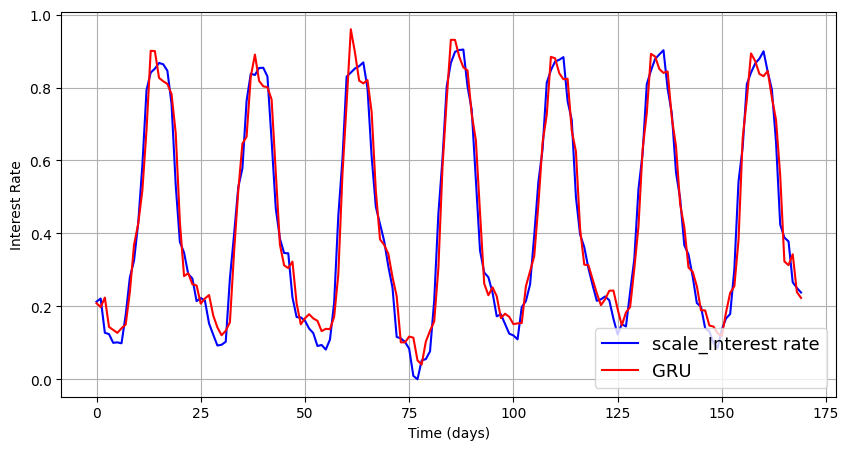

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ytest_r, label="scale_Interest rate", color = 'blue')
plt.plot(preds3_r, label="GRU", color = 'red')
plt.xlabel('Time (days)')
plt.ylabel('Interest Rate')
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [ ]:
real_pred3 = scaler1.inverse_transform(preds3_r)
actuals3 = scaler1.inverse_transform(ytest_r)

## Plot of Actual Interest Rate

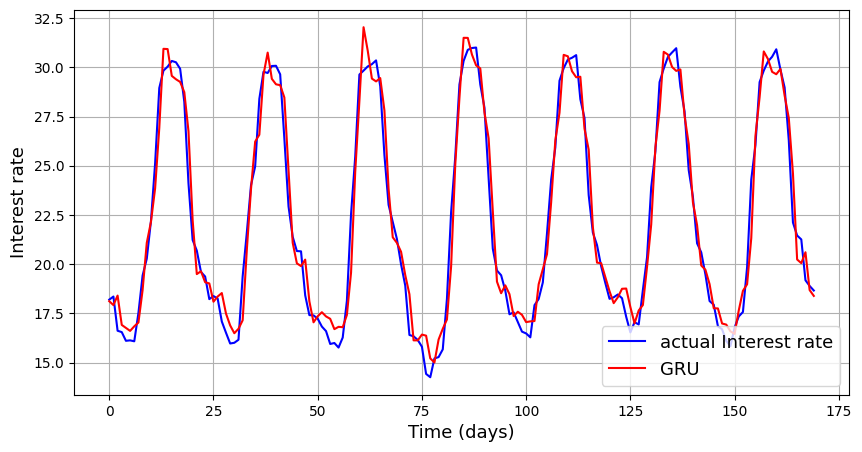

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals3, label="actual Interest rate", color = 'blue')
plt.plot(real_pred3, label="GRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

## Evaluation Metrics

In [ ]:
print('The the mean squared error committed by the GRU model is ', mean_squared_error(actuals3,real_pred3))
print('The root mean squared error committed by the GRU model is ', np.sqrt(mean_squared_error(actuals3,real_pred3)))
print('The the mean_absolute_percentage_error error committed by the  model is: ', mean_absolute_percentage_error(actuals3,real_pred3))
print('The the mean absolute error committed by the standard GRU model is: ', mean_absolute_error(actuals3,real_pred3))

The the mean squared error committed by the GRU model is  1.1131506594322975
The root mean squared error committed by the GRU model is  1.0550595525525075
The the mean_absolute_percentage_error error committed by the  model is:  3.9227341378040252
The the mean absolute error committed by the standard GRU model is:  0.85566738070736


# C). Implementation of the BIDIRECTIONAL LSTM (BiLSTM)

In [ ]:
# import random
# import numpy as np
# import tensorflow as tf

# # Set seeds for reproducibility
# random.seed(39)
# np.random.seed(39)
# tf.random.set_seed(39)

# # Define the model
# model4 = tf.keras.Sequential()

# # First LSTM layer with tanh activation
# model4.add(LSTM(units=50, activation='tanh', input_shape=(lookback, 1), return_sequences=True))

# # Bidirectional LSTM layer with dropout
# model4.add(tf.keras.layers.Bidirectional(LSTM(units=50, return_sequences=True, dropout=0.001)))

# # Final LSTM layer with dropout (no return_sequences)
# model4.add(LSTM(units=50, dropout=0.001, return_sequences=False))

# # Output layer for regression
# model4.add(tf.keras.layers.Dense(1))

# # Adam optimizer with adjusted learning rate
# opt = tf.keras.optimizers.Adam(learning_rate=0.003)

# # Compile the model
# model4.compile(loss='mse', optimizer=opt, metrics=["mae"])

# # Print model summary
# model4.summary()

# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# history = model4.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=100,
#     batch_size=32,
#     callbacks=[reduce_lr, early_stopping]
# )

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

model4 = tf.keras.Sequential()

# Assuming your time series data has a shape of (samples, lookback, 1)
model4.add(LSTM(units=50, activation='relu', input_shape=(lookback, 1), return_sequences=True))  # Use tanh activation

# Gated Bi-directional LSTM with Dropout (improves robustness to noise)
model4.add(tf.keras.layers.Bidirectional(LSTM(units=50, return_sequences=True, dropout=0.001)))

# Dropout for further regularization (optional, adjust rate as needed)
model4.add(tf.keras.layers.Dropout(0.001))

# Final LSTM layer with Dropout
model4.add(LSTM(units=50, dropout=0.001))

# Output layer based on your forecasting task
model4.add(tf.keras.layers.Dense(1))  # Adjust the number of units based on your prediction target

# Adam optimizer with adjusted learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.003)

# Common loss function (MSE) and metrics (MAE) for time series forecasting
model4.compile(loss='mse', optimizer=opt, metrics=["mae"])

model4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 50, 100)             │          40,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,051 (316.61 KB)

 Trainable params: 81,051 (316.61 KB)

 Non-trainable params: 0 (0.00 B)

## Fitting the Model

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

In [ ]:
valid_score = 0.2
np.random.seed(1)
result4=model4.fit(xtrain,ytrain, validation_data=(xvalid,yvalid), epochs=100,callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)


Epoch 44: early stopping
> Compilation Time :  237.27406072616577


In [ ]:
df4 = pd.DataFrame(result4.history)
df4.tail()

,loss,mae,val_loss,val_mae
39,0.001835,0.031618,0.003192,0.040620
40,0.001884,0.032151,0.003211,0.041035
41,0.001851,0.031850,0.003377,0.042226
42,0.001800,0.031365,0.003250,0.041345
43,0.001846,0.031715,0.003268,0.041304


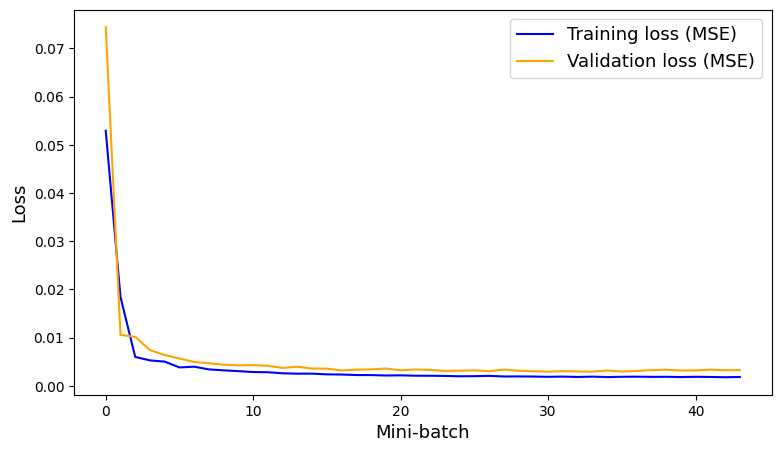

In [ ]:
print('')

plt.figure(figsize=(9,5))
plt.plot(df4['loss'], label ='Training loss (MSE)', color = 'blue')
plt.plot(df4['val_loss'], label='Validation loss (MSE)', color = 'orange')
plt.xlabel('Mini-batch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(fontsize=13)
# plt.savefig('LRA_error.eps', format='eps', dpi=1000)
plt.show()

## Predictions

In [ ]:
preds5 = model4.predict(xtest)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


In [ ]:
ytest_r = ytest.reshape((-1, 1))
preds5_r = preds5.reshape((-1, 1))

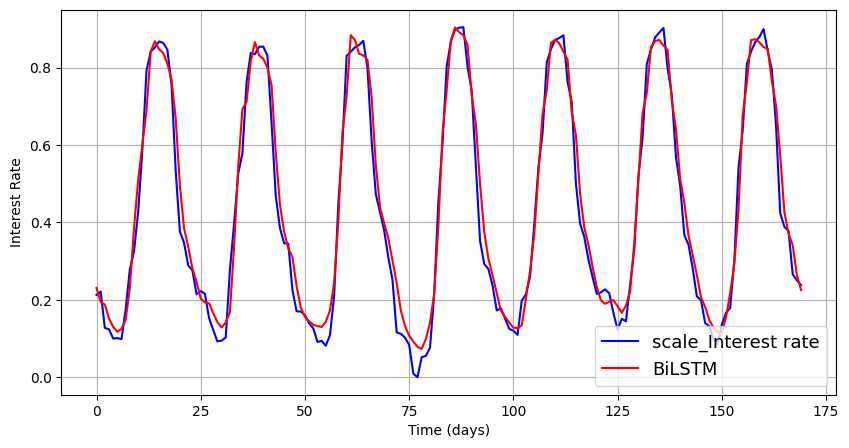

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ytest, label="scale_Interest rate", color = 'blue')
plt.plot(preds5_r, label="BiLSTM", color = 'red')
plt.xlabel('Time (days)')
plt.ylabel('Interest Rate')
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [ ]:
real_pred5 = scaler1.inverse_transform(preds5_r)
actuals5 = scaler1.inverse_transform(ytest_r)

## Plot the actual Interest Rate

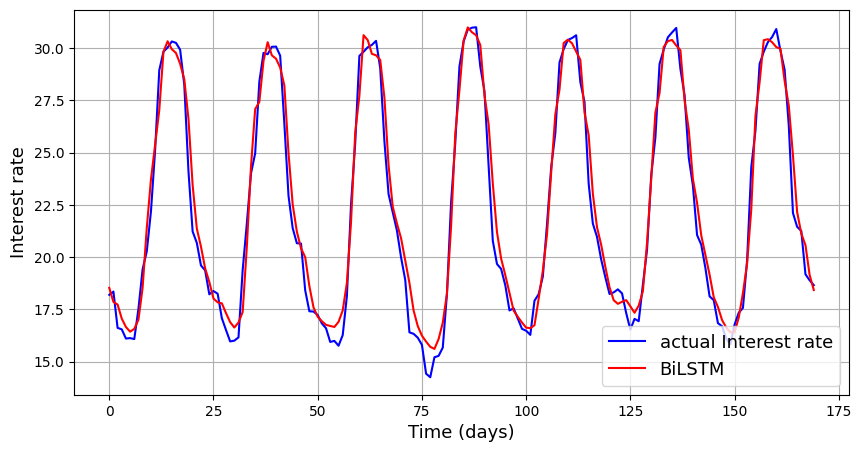

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals5, label="actual Interest rate", color = 'blue')
plt.plot(real_pred5, label="BiLSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

##  Metrics Evaluations

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_pred)) * 100

In [ ]:
print('The the mean squared error committed by the BiLSTM model is ', mean_squared_error(actuals5,real_pred5))
print('The root mean squared error committed by the BiLSTM model is ', np.sqrt(mean_squared_error(actuals5,real_pred5)))
print('The the mean_absolute_percentage_error error committed by the BiLSTM model is: ', mean_absolute_percentage_error(actuals5,real_pred5))
print('The the mean absolute error committed by the standard BiLSTM model is: ', mean_absolute_error(actuals5,real_pred5))

The the mean squared error committed by the BiLSTM model is  0.9083656007616332
The root mean squared error committed by the BiLSTM model is  0.953082158453107
The the mean_absolute_percentage_error error committed by the BiLSTM model is:  3.421742310078187
The the mean absolute error committed by the standard BiLSTM model is:  0.7462425581357277


# d). Implementation of the Clockwork BiGRU Algorithm

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Bidirectional, GRU, Dense, Dropout
# from keras.optimizers import Adam
# from keras.callbacks import ReduceLROnPlateau

# def create_bigru_model(lookback, n_features, units=80, dropout_rate=0.001, recurrent_dropout_rate=0.001, learning_rate=0.003):
#     model = Sequential()

#     # Bidirectional GRU layer with tanh activation and recurrent dropout
#     model.add(Bidirectional(
#         GRU(units, activation='tanh', recurrent_dropout=recurrent_dropout_rate, return_sequences=False),
#         input_shape=(lookback, n_features)
#     ))

#     # Dropout for regularization
#     model.add(Dropout(dropout_rate))

#     # Output layer for regression
#     model.add(Dense(1))

#     # Adam optimizer with custom learning rate
#     optimizer = Adam(learning_rate=learning_rate)

#     # Compile the model
#     model.compile(optimizer=optimizer, loss='mse', metrics=["mae"])

#     return model


# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)

# # Train the model with the scheduler
# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=100,
#     batch_size=32,
#     callbacks=[reduce_lr]
# )


In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np

learning_rate=0.003

def create_bigru_model(lookback, n_features, units=80, dropout_rate=0.001, learning_rate=0.003):
    model = Sequential()
    model.add(Bidirectional(GRU(units, activation='relu'), input_shape=(lookback, n_features)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    optimizer = Adam(learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=["mae"])
    return model

In [ ]:
bigru_model = create_bigru_model(lookback, n_features, units=64, dropout_rate=0.001)
bigru_model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<Sequential name=sequential_3, built=True>

In [ ]:
 early_stop=EarlyStopping(monitor='val_loss',patience=10,verbose=1)

In [ ]:
np.random.seed(1)
result=bigru_model.fit(xtrain,ytrain, validation_data=(xvalid,yvalid), epochs=100,callbacks=[early_stop], verbose=0)

Epoch 30: early stopping


In [ ]:
df = pd.DataFrame(result.history)
df.tail()

,loss,mae,val_loss,val_mae
25,0.002069,0.034004,0.003318,0.042103
26,0.002072,0.033986,0.003275,0.042013
27,0.002083,0.033953,0.003269,0.041766
28,0.002081,0.034125,0.003235,0.041587
29,0.002051,0.033591,0.003264,0.041905


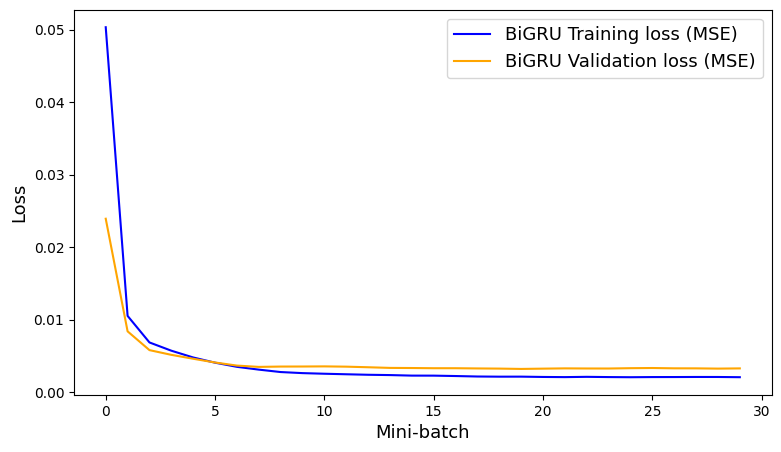

In [ ]:
print('')
plt.figure(figsize=(9,5))
plt.plot(df['loss'], label ='BiGRU Training loss (MSE)', color = 'blue')
plt.plot(df['val_loss'], label='BiGRU Validation loss (MSE)', color = 'orange')
plt.xlabel('Mini-batch', fontsize=13)
plt.ylabel('Loss', fontsize=13)
plt.legend(fontsize=13)
#plt.savefig('GRU2_error.eps', format='eps', dpi=1000)
plt.show()

## Predictions

In [ ]:
preds7 = bigru_model.predict(xtest)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step


In [ ]:
ytest_r = ytest.reshape((-1, 1))  # Reshape ytest to have one column
preds7_r = preds7.reshape((-1, 1))

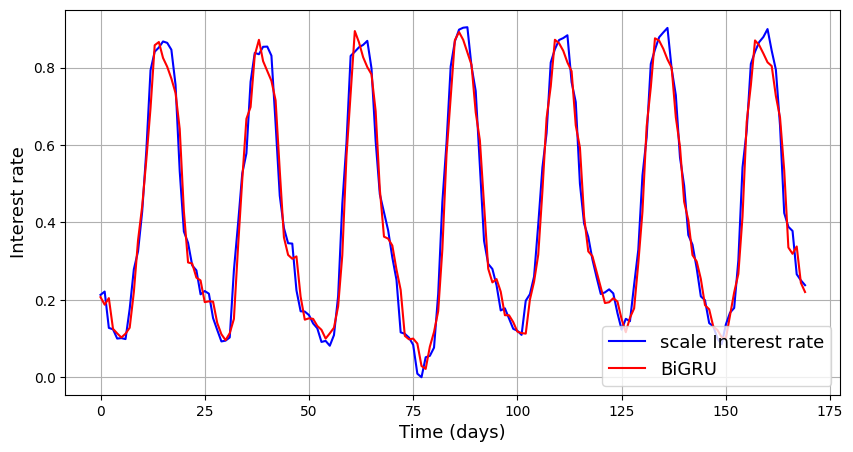

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(ytest_r, label="scale Interest rate", color = 'blue')
plt.plot(preds7_r, label="BiGRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

## Plot of Actual Interest Rate

In [ ]:
real_pred7 = scaler1.inverse_transform(preds7_r)
actuals7 = scaler1.inverse_transform(ytest_r)

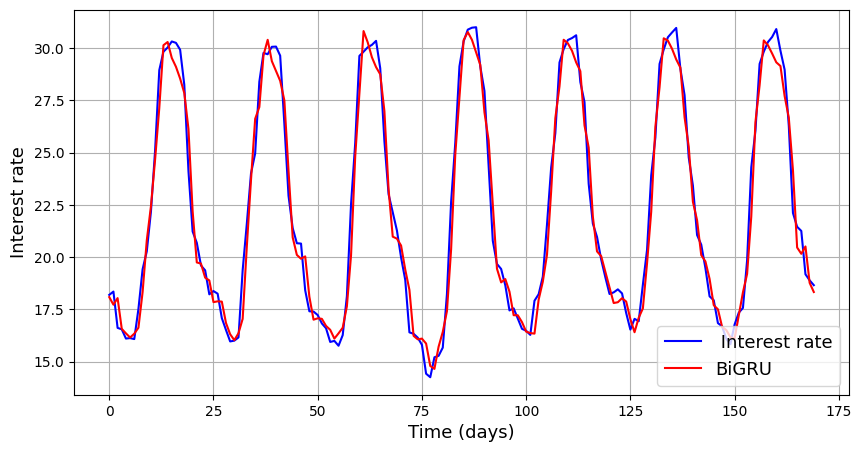

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals7, label=" Interest rate", color = 'blue')
plt.plot(real_pred7, label="BiGRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

## Metrics Evaluations

In [ ]:
print('The the mean squared error committed by the BiGRU model is ', mean_squared_error(actuals7,real_pred7))
print('The root mean squared error committed by the BiGRU model is ', np.sqrt(mean_squared_error(actuals7,real_pred7)))
print('The the mean_absolute_percentage_error error committed by the BiGRU model is: ', mean_absolute_percentage_error(actuals7,real_pred7))
print('The the mean absolute error committed by the standard BiGRU model is: ', mean_absolute_error(actuals7,real_pred7))

The the mean squared error committed by the BiGRU model is  0.8126580512656756
The root mean squared error committed by the BiGRU model is  0.9014754856709503
The the mean_absolute_percentage_error error committed by the BiGRU model is:  3.2649915877485634
The the mean absolute error committed by the standard BiGRU model is:  0.7160513684571043


# First Combination

In [ ]:

# Reshape multidimensional arrays to be one-dimensional

real_pred1_1d = real_pred1[:, 0]
real_pred3_1d = real_pred3[:, 0]
real_pred5_1d = real_pred5[:, 0]
real_pred7_1d = real_pred7[:, 0]
actuals1_1d = actuals1[:, 0]

# Create DataFrame with one-dimensional arrays

Pred_Data3 = pd.DataFrame({
    'LSTM': real_pred1_1d,
    'GRU': real_pred3_1d,
    'BiLSTM': real_pred5_1d,
    'BiGRU': real_pred7_1d,
    'Interest Rate': actuals1_1d
})
Pred_Data3

,LSTM,GRU,BiLSTM,BiGRU,Interest Rate
0,18.891809,18.114008,18.529726,18.086441,18.193283
1,18.215458,17.918207,17.854649,17.723804,18.351929
2,17.902048,18.400913,17.732161,18.038048,16.613982
3,17.123775,16.909437,17.057907,16.567640,16.544201
4,16.768333,16.756197,16.656342,16.351624,16.102856
...,...,...,...,...,...
165,21.967323,20.234726,22.161694,20.461607,21.452678
166,21.170111,20.049204,21.128469,20.159092,21.253477
167,20.714310,20.602018,20.575176,20.510839,19.179153
168,19.473244,18.680132,19.143892,18.770075,18.889893


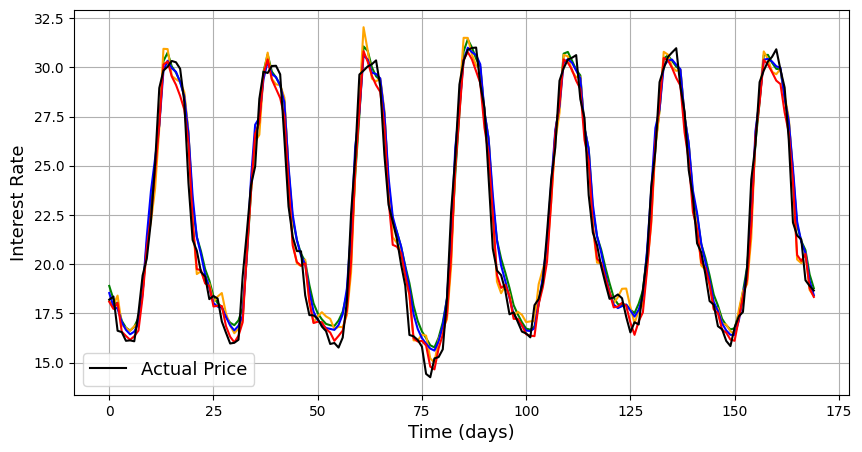

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(Pred_Data3['LSTM'], color = 'green')
plt.plot(Pred_Data3['GRU'], color = 'orange')
plt.plot(Pred_Data3['BiLSTM'], color = 'blue')
plt.plot(Pred_Data3['BiGRU'], color = 'red')
plt.plot(actuals1_1d, color = 'black', label = 'Actual Price')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest Rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

## STATISTICAL TESTS SHOWING THE EXISTENCE OF THE OUTLIERS

# Implementation of the SSA

In [ ]:
import pandas as pd
import numpy as np

class SSA(object):

    __supported_types = (pd.Series, np.ndarray, list)

    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.

        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list.
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.

        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """

        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")

        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")

        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1

        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T

        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)

        self.TS_comps = np.zeros((self.N, self.d))

        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]

            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]

            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."

            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."

        # Calculate the w-correlation matrix.
        self.calc_wcorr()

    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d

        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)


    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.

        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]

        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)

    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """

        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])

        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)

        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5

        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]

    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d

        if self.Wcorr is None:
            self.calc_wcorr()

        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)

        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max

        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)

In [ ]:
Time_series_data = dtemp['Temperature(C)']
Time_series_data

,Temperature(C)
0,20.780521
1,20.783503
2,20.469790
3,20.326055
4,20.005185
...,...
2203,21.452678
2204,21.253477
2205,19.179153
2206,18.889893


In [ ]:
# 3. Apply the SSA on the time series

window = 1104  # Windows length of SSA
accel_ssa = SSA(Time_series_data, window)
accel_ssa

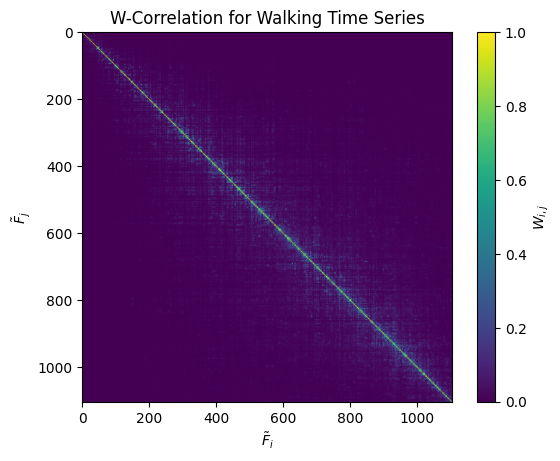

In [ ]:
accel_ssa.plot_wcorr()
plt.title("W-Correlation for Walking Time Series");

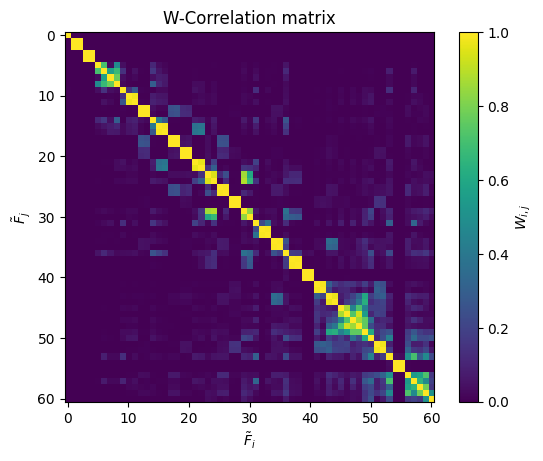

In [ ]:
accel_ssa.plot_wcorr(max=60)
plt.title("W-Correlation matrix")
plt.savefig('Temperature.eps', format='eps', dpi=1000)

<ipython-input-80-b9b21cb54a14>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(reversed_dates)


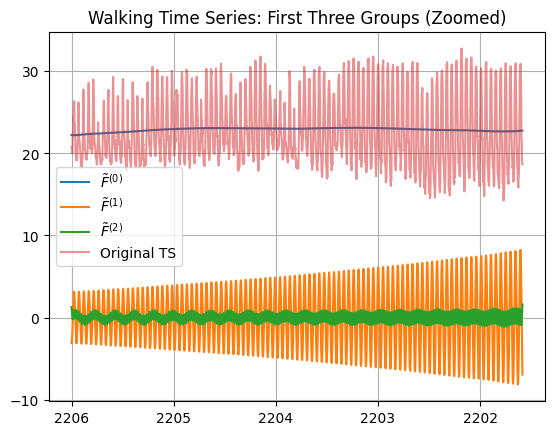

In [ ]:
# Plotting the reconstructed components
accel_ssa.reconstruct(0).plot()
accel_ssa.reconstruct([1, 2]).plot()
accel_ssa.reconstruct([3, 10]).plot()

# Plotting the original time series
accel_ssa.orig_TS.plot(alpha=0.5)

plt.title("Walking Time Series: First Three Groups (Zoomed)")
legend = [r"$\tilde{F}^{(%d)}$" % i for i in range(3)] + ["Original TS"]
plt.grid()
plt.legend(legend)

# Reversing the x-axis labels
reversed_dates = reversed(accel_ssa.orig_TS.index)
plt.gca().set_xticklabels(reversed_dates)

plt.show()

## Combining the first 20 elementary components together, and plotting the remaining the 61 Components.

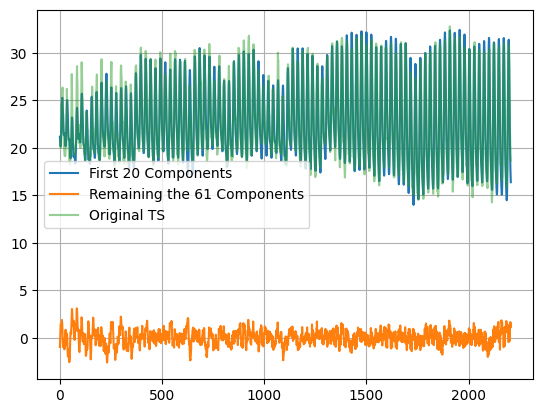

In [ ]:
accel_ssa.reconstruct(slice(0,30)).plot()
accel_ssa.reconstruct(slice(30,80)).plot()
accel_ssa.orig_TS.plot(alpha=0.5)
# plt.xlabel('Date', fontsize=13)
# plt.ylabel('Average', fontsize=13)
plt.grid()
plt.legend(["First 20 Components", "Remaining the 61 Components", "Original TS"]);

# News Hybrids Consideration

In [ ]:
# Créez un objet MinMaxScaler
scaler1 = MinMaxScaler(feature_range=(0,1))

# Supposons que vous souhaitez normaliser la colonne 'TimeSeries'
time_series_data = dtemp[['Temperature(C)']]

# Appliquer la normalisation sur les données de la colonne 'TimeSeries'
normalised_average = scaler1.fit_transform(time_series_data.values)

##   Decompose the time series into Signal and Noise


In [ ]:
# Convertir le tableau NumPy bidimensionnel en une série pandas unidimensionnelle
normalised_series = pd.Series(normalised_average.flatten())
normalised_series.shape

(2208,)

In [ ]:
window = 1104  # WIndow length

# Create a SSA Instance

accel_ssa = SSA(normalised_series, window)

##   Select the first 25 principal component for the Signal

In [ ]:
def rnn_data_setup(data, lookback, delay, min_index, max_index):
    data_array = data.to_numpy()  # Convert Series to NumPy array
    samples = np.zeros((max_index - min_index - lookback, lookback, 1))
    targets = np.zeros((max_index - min_index - lookback, delay))

    for i in range(min_index + lookback, max_index):
        indices1 = range(i - lookback, i)
        indices2 = range(i, i + delay)
        samples[i - min_index - lookback] = data_array[indices1, np.newaxis]
        targets[i - min_index - lookback] = data_array[indices2][:, np.newaxis]

    return samples, targets

In [ ]:
signal_indices = slice(0, 20)
signal_reconstructed = accel_ssa.reconstruct(signal_indices)

In [ ]:
lookback = 50
delay = 1
min_index = 0
max_index = 2208
X_data, y_data = rnn_data_setup(signal_reconstructed, lookback, delay, min_index, max_index)
print('The shape of the input signal set is:', X_data.shape)
print('The shape of the target signal set is:', y_data.shape)
print('The shape of the target signal_reconstructed set is:', signal_reconstructed.shape)

The shape of the input signal set is: (2158, 50, 1)
The shape of the target signal set is: (2158, 1)
The shape of the target signal_reconstructed set is: (2208,)


In [ ]:
#Splitting the dataset into trainig, validation and testing.
X_signal_train, xvalid, X_signal_test = X_data[0:train_size,:], X_data[train_size:train_size+valid_size,:], X_data[train_size+valid_size:len(X_data),:]
y_signal_train, yvalid, y_signal_test = y_data[0:train_size,:], y_data[train_size:train_size+valid_size,:], y_data[train_size+valid_size:len(y_data),:]

print('The shape of the training sample is: ', X_signal_train.shape)
print('The shape of the testing sample is: ', X_signal_test.shape)
print('The shape of the training target is: ', y_signal_train.shape)
print('The shape of the testing target is: ', y_signal_test.shape)


The shape of the training sample is:  (1391, 50, 1)
The shape of the testing sample is:  (170, 50, 1)
The shape of the training target is:  (1391, 1)
The shape of the testing target is:  (170, 1)


# Triple Associations

## 5). Association SSA + BiGRU + LSTM

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

In [ ]:

# Find the prdiction using the BiGRU

def create_bigru_model(lookback, n_features, units=80, dropout_rate=0.001, learning_rate=0.003):
    model = Sequential()
    model.add(Bidirectional(GRU(units, activation='relu'), input_shape=(lookback, n_features)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=["mae"])
    return model

In [ ]:
bigru_model = create_bigru_model(lookback, n_features, units=30, dropout_rate=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## a). Fit the signal with the BiGRU

In [ ]:
n_epochs = 100
valid_score = 0.2
start = time.time()
bigru_model.fit(X_signal_train, y_signal_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 75: early stopping
> Compilation Time :  32.22108268737793


## b). Signal prediction

In [ ]:
signal_forecast8 = bigru_model.predict(X_signal_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step


## c). Fitting the Noise with the  LSTM

In [ ]:
noise = normalised_series - signal_reconstructed

In [ ]:
lookback = 50
delay = 1
min_index = 0
max_index = 2208
X_data_noise, y_data_noise = rnn_data_setup(noise, lookback, delay, min_index, max_index)


#Splitting the dataset into trainig, validation and testing.
X_noise_train, xvalid, X_noise_test = X_data_noise[0:train_size,:], X_data_noise[train_size:train_size+valid_size,:], X_data_noise[train_size+valid_size:len(X_data_noise),:]
y_noise_train, yvalid, y_noise_test = y_data_noise[0:train_size,:], y_data_noise[train_size:train_size+valid_size,:], y_data_noise[train_size+valid_size:len(y_data_noise),:]

print('The shape of the training sample is: ', X_noise_train.shape)
print('The shape of the testing sample is: ', X_noise_test.shape)
print('The shape of the training target is: ', y_noise_train.shape)
print('The shape of the testing target is: ', y_noise_test.shape)


The shape of the training sample is:  (1391, 50, 1)
The shape of the testing sample is:  (170, 50, 1)
The shape of the training target is:  (1391, 1)
The shape of the testing target is:  (170, 1)


In [ ]:
n_epochs = 100
valid_score = 0.2
start = time.time()
result1 = model1.fit(X_noise_train, y_noise_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 14: early stopping
> Compilation Time :  31.19906258583069


## d). Noise prediction

In [ ]:
noise_forecast8 = model1.predict(X_noise_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


## e). Add the two prediction

In [ ]:
forecast_final8 = signal_forecast8 + noise_forecast8
noise_forecast88 = noise_forecast8*5

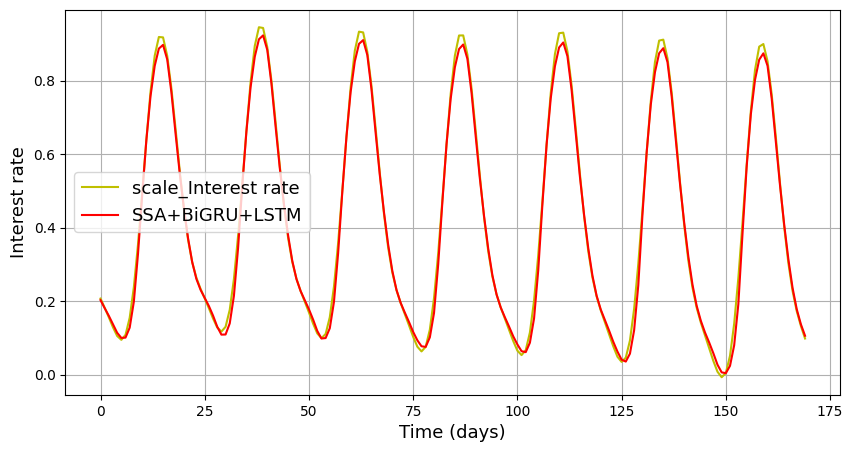

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(y_signal_test, label="scale_Interest rate", color = 'y')
plt.plot(signal_forecast8, label="SSA+BiGRU+LSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
# Inverse transform

actuals17 = scaler1.inverse_transform(y_signal_test)

In [ ]:
real_pred17 = scaler1.inverse_transform(signal_forecast8)

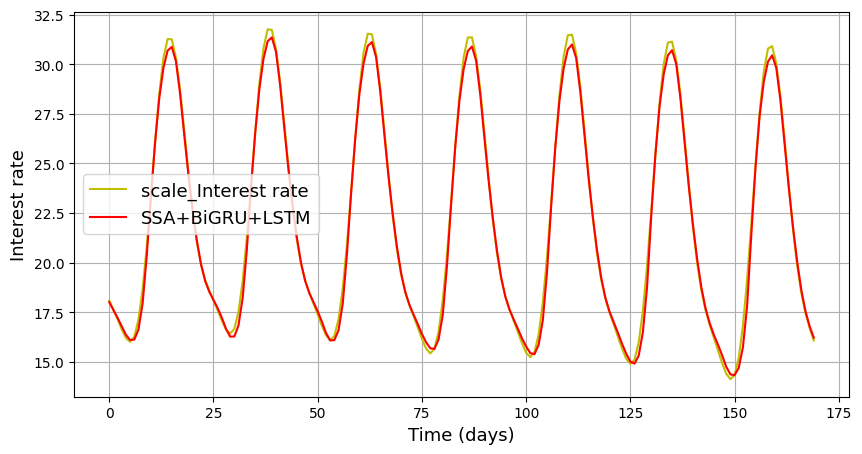

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals17, label="scale_Interest rate", color = 'y')
plt.plot(real_pred17, label="SSA+BiGRU+LSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()


# Metrics Evaluation

In [ ]:
print('The the mean squared error committed by the SSA+BiGRU+LSTM  model is ', mean_squared_error(actuals17,real_pred17))
print('The root mean squared error committed by the SSA+BiGRU+LSTM  model is ', np.sqrt(mean_squared_error(actuals17,real_pred17)))
print('The the mean_absolute_percentage_error error committed by the SSA+BiGRU+LSTM  model is: ', mean_absolute_percentage_error(actuals17,real_pred17))
print('The the mean absolute error committed by the standard SSA+BiGRU+LSTM  model is:  ', mean_absolute_error(actuals17,real_pred17))

The the mean squared error committed by the SSA+BiGRU+LSTM  model is  0.13235327051498585
The root mean squared error committed by the SSA+BiGRU+LSTM  model is  0.3638038901867129
The the mean_absolute_percentage_error error committed by the SSA+BiGRU+LSTM  model is:  1.2648803751412407
The the mean absolute error committed by the standard SSA+BiGRU+LSTM  model is:   0.264325387023764


## 6). Association SSA+LSTM( signal)+BiGRU( noise)

## a). Fit the signal with the LSTM

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

In [ ]:
n_epochs = 100
valid_score = 0.2
start = time.time()
model1.fit(X_signal_train, y_signal_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 30: early stopping
> Compilation Time :  66.17126822471619


## b). signal prediction

In [ ]:
signal_forecast10 = model1.predict(X_signal_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


## c). Fit the noise with the GRU

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

n_epochs = 100
valid_score = 0.2
start = time.time()
result1 = bigru_model.fit(X_noise_train, y_noise_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 12: early stopping
> Compilation Time :  4.8731443881988525


## d). Noise prediction

In [ ]:
noise_forecast10 = bigru_model.predict(X_noise_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


## e). Add the two predictions

In [ ]:
forecast_final10 = signal_forecast10 + noise_forecast10

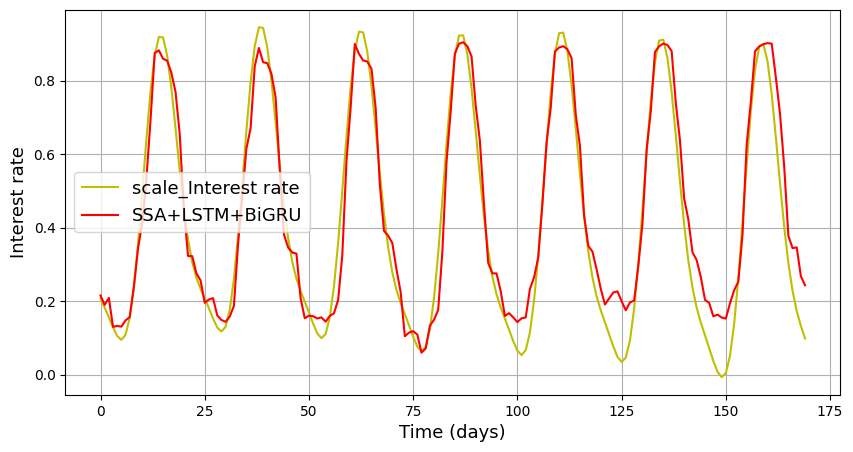

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(y_signal_test, label="scale_Interest rate", color = 'y')
plt.plot(forecast_final10, label="SSA+LSTM+BiGRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()



In [ ]:
# Inverse transform
actuals19 = scaler1.inverse_transform(y_signal_test)

In [ ]:
real_pred19 = scaler1.inverse_transform(forecast_final10)

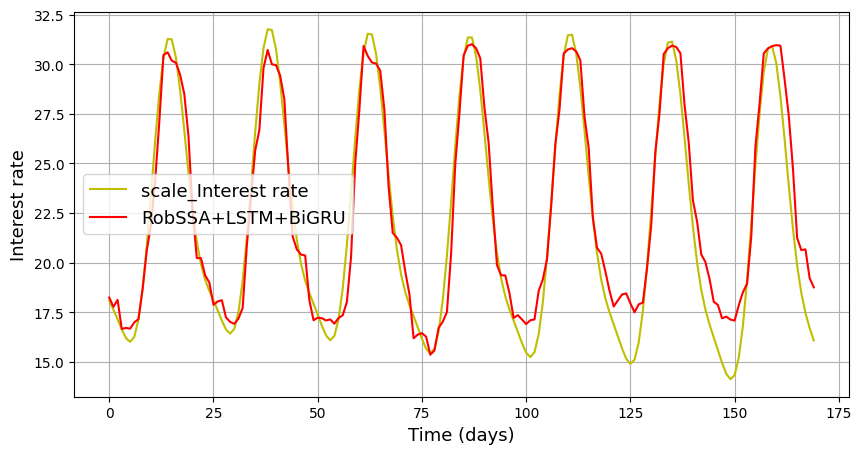

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals19, label="scale_Interest rate", color = 'y')
plt.plot(real_pred19, label="RobSSA+LSTM+BiGRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()



# Metrics Evaluations

In [ ]:
print('The the mean squared error committed by the SSA+LSTM+BiGRU  model is ', mean_squared_error(actuals19,real_pred19))
print('The root mean squared error committed by the SSA+LSTM+BiGRU   model is ', np.sqrt(mean_squared_error(actuals19,real_pred19)))
print('The the mean_absolute_percentage_error error committed by the SSA+LSTM+BiGRU   model is: ', mean_absolute_percentage_error(actuals19,real_pred19))
print('The the mean absolute error committed by the standard SSA+LSTM+BiGRU   model is:  ', mean_absolute_error(actuals19,real_pred19))

The the mean squared error committed by the SSA+LSTM+BiGRU  model is  1.9448871095496254
The root mean squared error committed by the SSA+LSTM+BiGRU   model is  1.394592094323507
The the mean_absolute_percentage_error error committed by the SSA+LSTM+BiGRU   model is:  5.121863654988103
The the mean absolute error committed by the standard SSA+LSTM+BiGRU   model is:   1.082827651025248


## 7). Association RobSSA+BiLSTM( signal)+BiGRU( noise)

## a). Fit the signal with the BiLSTM

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

n_epochs = 100
valid_score = 0.2
start = time.time()
model4.fit(X_signal_train, y_signal_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 14: early stopping
> Compilation Time :  33.574764251708984


## b). signal prediction

In [ ]:
signal_forecast12 = model4.predict(X_signal_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


## c). fit the noise with the BiGRU

In [ ]:
n_epochs = 100
valid_score = 0.2
start = time.time()
result1 = bigru_model.fit(X_noise_train, y_noise_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 20: early stopping
> Compilation Time :  7.652844429016113


## d). Noise prediction

In [ ]:
noise_forecast12 = bigru_model.predict(X_noise_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
forecast_final12 = signal_forecast12 + noise_forecast12

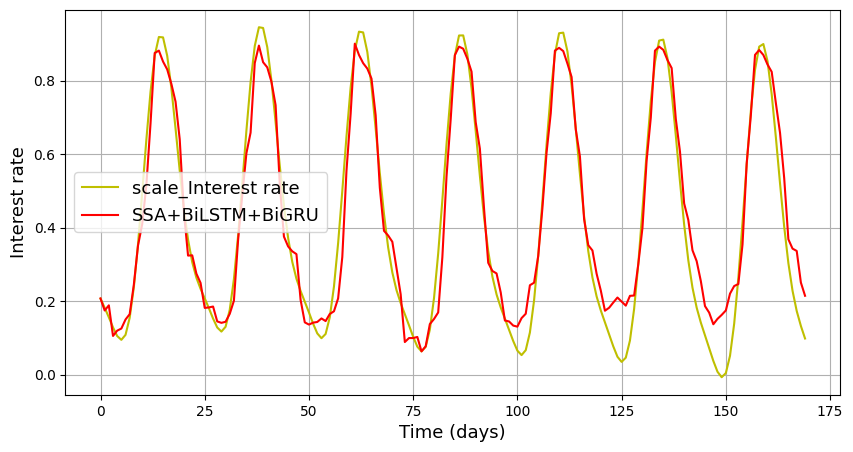

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(y_signal_test, label="scale_Interest rate", color = 'y')
plt.plot(forecast_final12, label="SSA+BiLSTM+BiGRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

In [ ]:

# Inverse transform
actuals21 = scaler1.inverse_transform(y_signal_test)

In [ ]:
real_pred21 = scaler1.inverse_transform(forecast_final12)

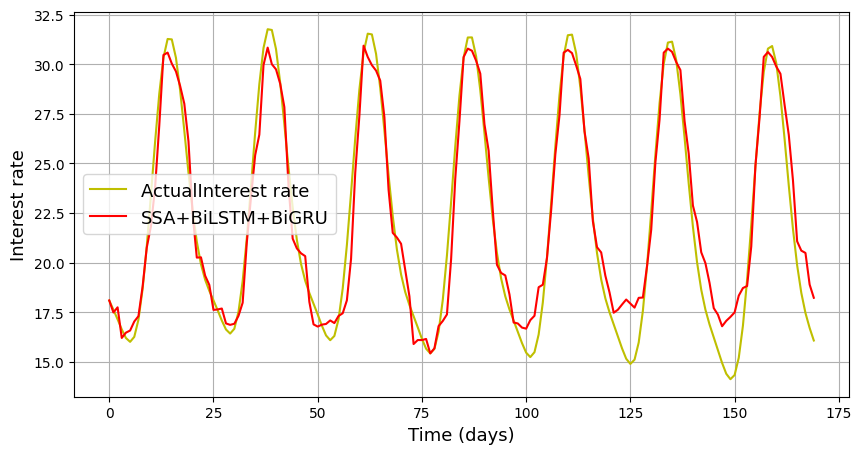

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals21, label="ActualInterest rate", color = 'y')
plt.plot(real_pred21, label="SSA+BiLSTM+BiGRU", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()



In [ ]:
print('The the mean squared error committed by the SSA+BiLSTM+BiGRU  model is ', mean_squared_error(actuals21,real_pred21))
print('The root mean squared error committed by the SSA+BiLSTM+BiGRU   model is ', np.sqrt(mean_squared_error(actuals21,real_pred21)))
print('The the mean_absolute_percentage_error error committed by the SSA+BiLSTM+BiGRU   model is: ', mean_absolute_percentage_error(actuals21,real_pred21))
print('The the mean absolute error committed by the standard SSA+BiLSTM+BiGRU   model is:  ', mean_absolute_error(actuals21,real_pred21))

The the mean squared error committed by the SSA+BiLSTM+BiGRU  model is  1.717968889073106
The root mean squared error committed by the SSA+BiLSTM+BiGRU   model is  1.3107131223395552
The the mean_absolute_percentage_error error committed by the SSA+BiLSTM+BiGRU   model is:  4.862253631934825
The the mean absolute error committed by the standard SSA+BiLSTM+BiGRU   model is:   1.0114812726070408


# 8). Association SSA+BiGRU( signal)+BiLSTM( noise)

## a). Fit the signal with the BiGRU

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

n_epochs = 100
valid_score = 0.2
start = time.time()
bigru_model.fit(X_signal_train, y_signal_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 52: early stopping
> Compilation Time :  16.4917631149292


## b). signal prediction

In [ ]:
signal_forecast14 = bigru_model.predict(X_signal_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


## c). Fit the noise with the BiLSTM

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

n_epochs = 100
valid_score = 0.2
start = time.time()
result1 = model4.fit(X_noise_train, y_noise_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 12: early stopping
> Compilation Time :  29.796791315078735


## d). Noise prediction

In [ ]:
noise_forecast14 = model4.predict(X_noise_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
forecast_final14 = signal_forecast14 + noise_forecast14

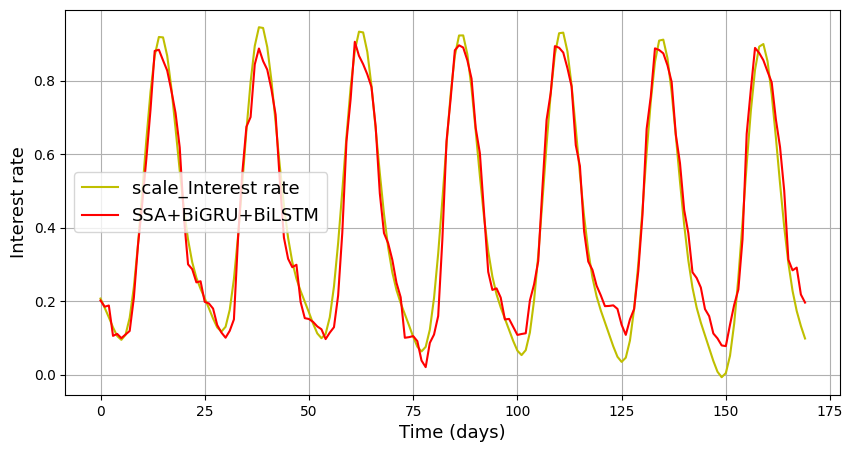

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(y_signal_test, label="scale_Interest rate", color = 'y')
plt.plot(forecast_final14, label="SSA+BiGRU+BiLSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
# Inverse transform
actuals23 = scaler1.inverse_transform(y_signal_test)

In [ ]:
real_pred23 = scaler1.inverse_transform(forecast_final14)

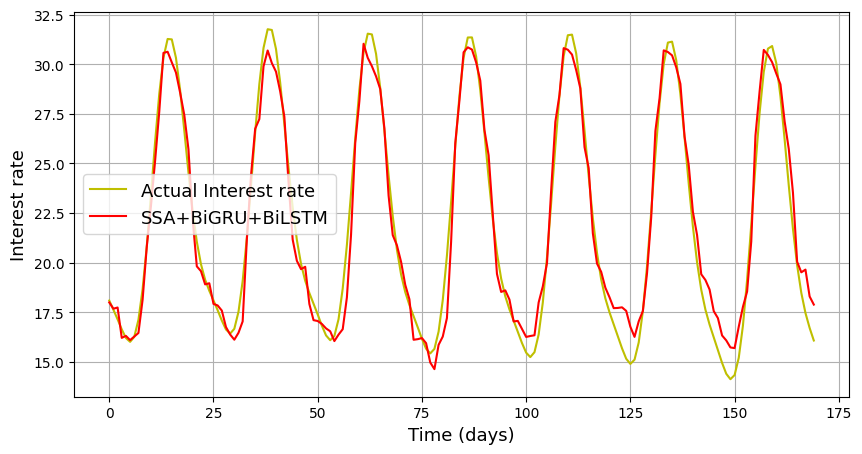

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals23, label="Actual Interest rate", color = 'y')
plt.plot(real_pred23, label="SSA+BiGRU+BiLSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
print('The the mean squared error committed by the SSA+BiGRU+BiLSTM  model is ', mean_squared_error(actuals23,real_pred23))
print('The root mean squared error committed by the SSA+BiGRU+BiLSTM    model is ', np.sqrt(mean_squared_error(actuals23,real_pred23)))
print('The the mean_absolute_percentage_error error committed by the SSA+BiGRU+BiLSTM     model is: ', mean_absolute_percentage_error(actuals23,real_pred23))
print('The the mean absolute error committed by the standard SSA+BiGRU+BiLSTM     model is:  ', mean_absolute_error(actuals23,real_pred23))


The the mean squared error committed by the SSA+BiGRU+BiLSTM  model is  1.0023147619913684
The root mean squared error committed by the SSA+BiGRU+BiLSTM    model is  1.0011567120043536
The the mean_absolute_percentage_error error committed by the SSA+BiGRU+BiLSTM     model is:  3.9046932947619086
The the mean absolute error committed by the standard SSA+BiGRU+BiLSTM     model is:   0.7997144329727546


## 9. Association SSA+GRU+LSTM

## a). Fit the signal with the GRU

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)


n_epochs = 100
valid_score = 0.2
start = time.time()
model3.fit(X_signal_train, y_signal_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 27: early stopping
> Compilation Time :  7.561774015426636


## b) signal prediction

In [ ]:
signal_forecast16 = model3.predict(X_signal_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


## c). Fit the noise with the LSTM

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

n_epochs = 100
valid_score = 0.2
start = time.time()
result1 = model1.fit(X_noise_train, y_noise_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 13: early stopping
> Compilation Time :  29.688668489456177


## d). Noise prediction

In [ ]:
noise_forecast16 = model1.predict(X_noise_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [ ]:
forecast_final16 = signal_forecast16 + noise_forecast16

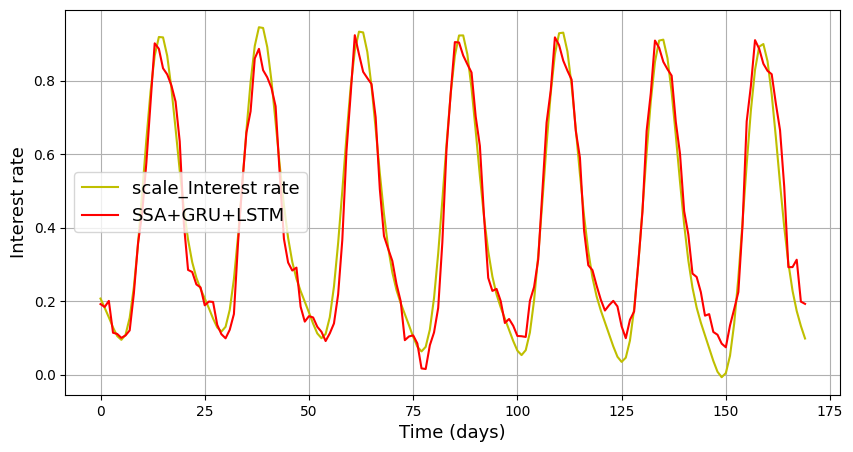

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(y_signal_test, label="scale_Interest rate", color = 'y')
plt.plot(forecast_final16, label="SSA+GRU+LSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()



In [ ]:
# Inverse transform
actuals25 = scaler1.inverse_transform(y_signal_test)

In [ ]:
real_pred25 = scaler1.inverse_transform(forecast_final16)

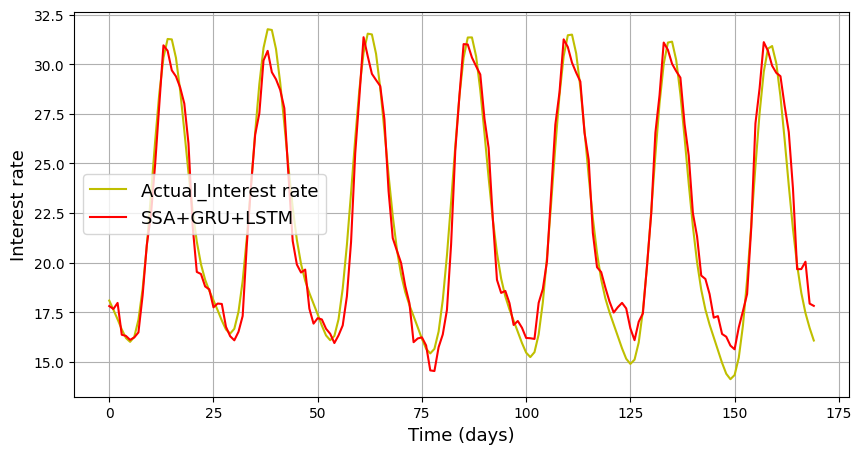

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals25, label="Actual_Interest rate", color = 'y')
plt.plot(real_pred25, label="SSA+GRU+LSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
print('The the mean squared error committed by the SSA+GRU+LSTM  model is ', mean_squared_error(actuals25,real_pred25))
print('The root mean squared error committed by the SSA+GRU+LSTM    model is ', np.sqrt(mean_squared_error(actuals25,real_pred25)))
print('The the mean_absolute_percentage_error error committed by the SSA+GRU+LSTM     model is: ', mean_absolute_percentage_error(actuals25,real_pred25))
print('The the mean absolute error committed by the standard SSA+GRU+LSTM     model is:  ', mean_absolute_error(actuals25,real_pred25))

The the mean squared error committed by the SSA+GRU+LSTM  model is  1.1688846653783895
The root mean squared error committed by the SSA+GRU+LSTM    model is  1.081149696100586
The the mean_absolute_percentage_error error committed by the SSA+GRU+LSTM     model is:  4.14854029321557
The the mean absolute error committed by the standard SSA+GRU+LSTM     model is:   0.8693710675872972


## Association RobSSA + GRU + GRU

In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

n_epochs = 100
valid_score = 0.2
start = time.time()
model3.fit(X_signal_train, y_signal_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 97: early stopping
> Compilation Time :  24.688374757766724


### Signal Prediction

In [ ]:
signal_forecast17 = model3.predict(X_signal_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
random.seed(39)
np.random.seed(39)
tf.random.set_seed(49)

n_epochs = 100
valid_score = 0.2
start = time.time()
result1 = model3.fit(X_noise_train, y_noise_train, batch_size=50, epochs=n_epochs, validation_split=valid_score, callbacks=[early_stop], verbose=0)
print("> Compilation Time : ", time.time() - start)

Epoch 11: early stopping
> Compilation Time :  3.090548515319824


### Noise prediction

In [ ]:
noise_forecast17 = model3.predict(X_noise_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
forecast_final17 = signal_forecast17 + noise_forecast17

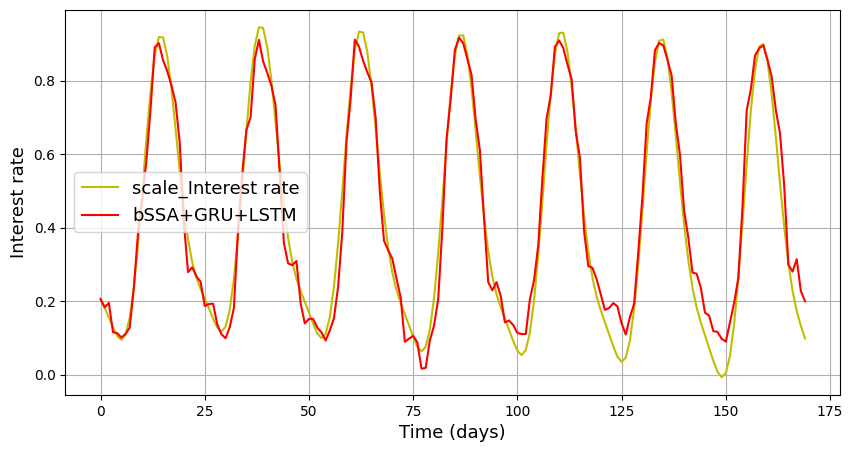

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(y_signal_test, label="scale_Interest rate", color = 'y')
plt.plot(forecast_final17, label="bSSA+GRU+LSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
# Inverse transform
actuals27 = scaler1.inverse_transform(y_signal_test)

In [ ]:
real_pred27 = scaler1.inverse_transform(signal_forecast17)

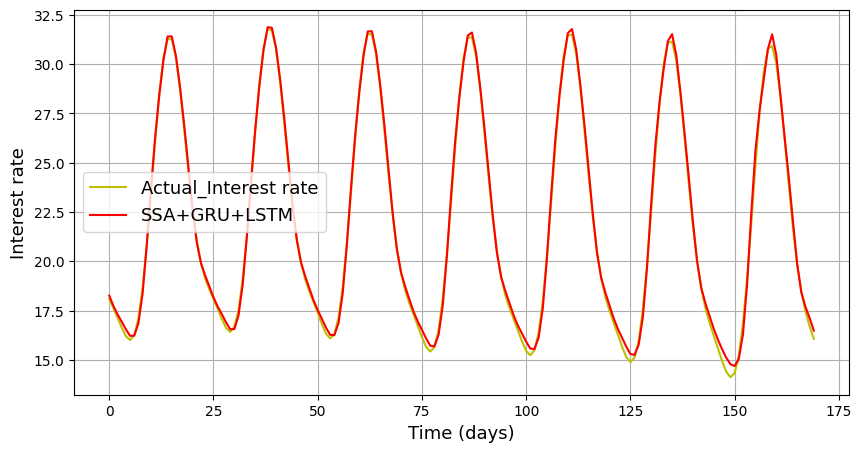

In [ ]:
print('')
plt.figure(figsize=(10,5))
plt.plot(actuals27, label="Actual_Interest rate", color = 'y')
plt.plot(real_pred27, label="SSA+GRU+LSTM", color = 'red')
plt.xlabel('Time (days)', fontsize=13)
plt.ylabel('Interest rate', fontsize=13)
plt.legend(fontsize=13)
plt.grid()
# plt.savefig('RNN_model1.eps', format='eps', dpi=1000)
plt.show()

In [ ]:
print('The the mean squared error committed by the SSA+GRU+GRU  model is ', mean_squared_error(actuals27,real_pred27))
print('The root mean squared error committed by the SSA+GRU+GRU    model is ', np.sqrt(mean_squared_error(actuals27,real_pred27)))
print('The the mean_absolute_percentage_error error committed by the SSA+GRU+GRU     model is: ', mean_absolute_percentage_error(actuals27,real_pred27))
print('The the mean absolute error committed by the standard SSA+GRU+GRU model is:  ', mean_absolute_error(actuals27,real_pred27))

The the mean squared error committed by the SSA+GRU+GRU  model is  0.06645104017687538
The root mean squared error committed by the SSA+GRU+GRU    model is  0.2577809926601948
The the mean_absolute_percentage_error error committed by the SSA+GRU+GRU     model is:  1.0560292530575106
The the mean absolute error committed by the standard SSA+GRU+GRU model is:   0.21097532828757098


# Combined models3

# General Combination

In [ ]:

import pandas as pd

# Reshape multidimensional arrays to be one-dimensional
real_pred1_1d = real_pred1[:, 0]
real_pred3_1d = real_pred3[:, 0]
real_pred5_1d = real_pred5[:, 0]
real_pred7_1d = real_pred7[:, 0]
real_pred17_1d = real_pred17[:, 0]
real_pred19_1d = real_pred19[:, 0]
real_pred21_1d = real_pred21[:, 0]
real_pred23_1d = real_pred23[:, 0]
real_pred25_1d = real_pred25[:, 0]
real_pred27_1d = real_pred27[:, 0]
actuals1_1d = actuals1[:, 0]

# Create DataFrame with one-dimensional arrays
Pred_Data6 = pd.DataFrame({
    'LSTM': real_pred1_1d,
    'GRU': real_pred3_1d,
    'BiLSTM': real_pred5_1d,
    'BiGRU': real_pred7_1d,
    'SSA+BiGRU+LSTM': real_pred17_1d,
    'SSA+LSTM+BiGRU': real_pred19_1d,
    'SSA+BiLSTM+BiGRU': real_pred21_1d,
    'SSA+BiGRU+BiLSTM' : real_pred23_1d,
    'SSA+GRU+LSTM': real_pred25_1d,
    'SSA+GRU+GRU': real_pred25_1d,
    'Interest Rate': actuals1_1d
})
Pred_Data6

,LSTM,GRU,BiLSTM,BiGRU,SSA+BiGRU+LSTM,SSA+LSTM+BiGRU,SSA+BiLSTM+BiGRU,SSA+BiGRU+BiLSTM,SSA+GRU+LSTM,SSA+GRU+GRU,Interest Rate
0,18.891809,18.114008,18.529726,18.086441,18.008823,18.239519,18.092155,17.992517,17.809496,17.809496,18.193283
1,18.215458,17.918207,17.854649,17.723804,17.605610,17.768940,17.485939,17.675520,17.662336,17.662336,18.351929
2,17.902048,18.400913,17.732161,18.038048,17.214924,18.120729,17.745626,17.736973,17.968487,17.968487,16.613982
3,17.123775,16.909437,17.057907,16.567640,16.786911,16.659670,16.202126,16.206566,16.363390,16.363390,16.544201
4,16.768333,16.756197,16.656342,16.351624,16.359991,16.707129,16.469246,16.305658,16.304466,16.304466,16.102856
...,...,...,...,...,...,...,...,...,...,...,...
165,21.967323,20.234726,22.161694,20.461607,20.070312,21.252842,21.074594,20.046143,19.669670,19.669670,21.452678
166,21.170111,20.049204,21.128469,20.159092,18.630865,20.631634,20.604221,19.510622,19.674091,19.674091,21.253477
167,20.714310,20.602018,20.575176,20.510839,17.556124,20.668676,20.487738,19.647337,20.045185,20.045185,19.179153
168,19.473244,18.680132,19.143892,18.770075,16.790880,19.215992,18.893715,18.291817,17.932543,17.932543,18.889893


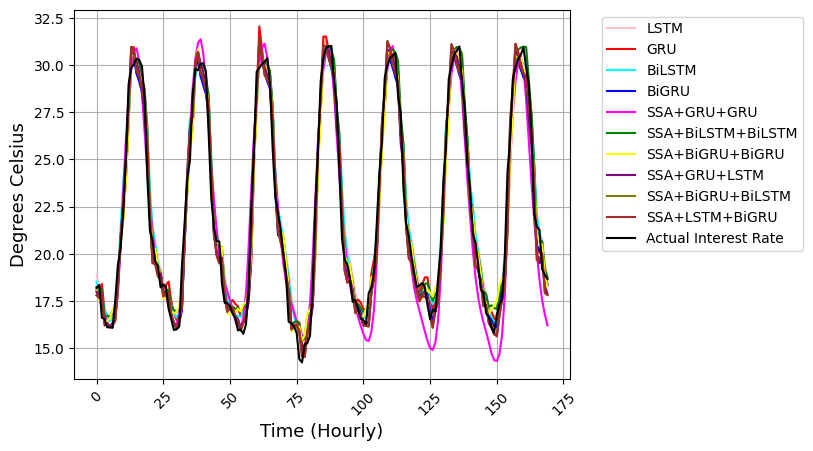

In [ ]:
# plt.figure(figsize=(10, 5))
plt.plot(Pred_Data6['LSTM'], color='pink', label='LSTM')
plt.plot(Pred_Data6['GRU'], color='red', label='GRU')
plt.plot(Pred_Data6['BiLSTM'], color='cyan', label='BiLSTM')
plt.plot(Pred_Data6['BiGRU'], color='blue', label='BiGRU')
plt.plot(Pred_Data6['SSA+BiGRU+LSTM'], color='Magenta', label='SSA+GRU+GRU')
plt.plot(Pred_Data6['SSA+LSTM+BiGRU'], color='green', label='SSA+BiLSTM+BiLSTM')
plt.plot(Pred_Data6['SSA+BiLSTM+BiGRU'], color='yellow', label='SSA+BiGRU+BiGRU')
plt.plot(Pred_Data6['SSA+BiGRU+BiLSTM'], color='purple', label='SSA+GRU+LSTM')
plt.plot(Pred_Data6['SSA+GRU+LSTM'], color='olive', label='SSA+BiGRU+BiLSTM')
plt.plot(Pred_Data6['SSA+GRU+GRU'], color='brown', label='SSA+LSTM+BiGRU')

plt.plot(actuals1_1d, color='black', label='Actual Interest Rate')
plt.xlabel('Time (Hourly)', fontsize=13)
plt.ylabel('Degrees Celsius', fontsize=13)
# plt.legend(fontsize=13)
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Temperature.eps', format='eps', dpi=2000)
plt.show()

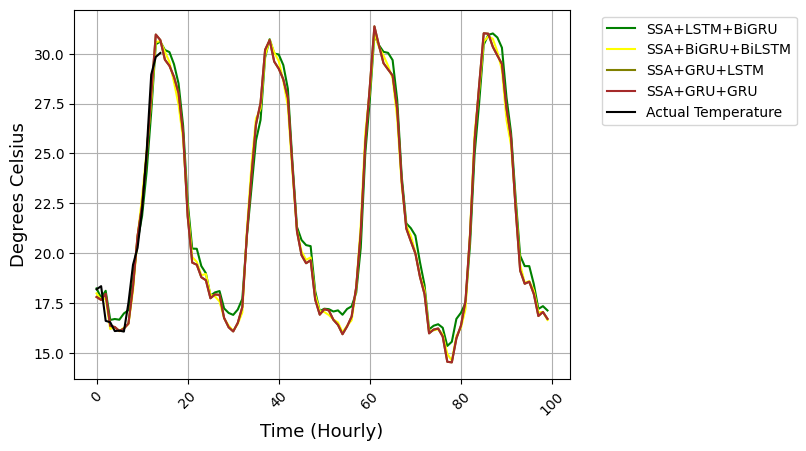

In [ ]:
import matplotlib.pyplot as plt

# Réduire la taille de chaque série de données à 30
Pred_Data6_30 = Pred_Data6.iloc[:100]

# plt.figure(figsize=(5, 5))
# plt.plot(Pred_Data6_30['LSTM'], color='cyan', label='LSTM')
# plt.plot(Pred_Data6_30['GRU'], color='red', label='GRU')
# plt.plot(Pred_Data6_30['BiLSTM'], color='pink', label='BiLSTM')
# plt.plot(Pred_Data6_30['BiGRU'], color='blue', label='BiGRU')
# plt.plot(Pred_Data6_30['SSA+BiGRU+LSTM'], color='Magenta', label='SSA+GRU+GRU')
plt.plot(Pred_Data6_30['SSA+LSTM+BiGRU'], color='green', label='SSA+LSTM+BiGRU')
#plt.plot(Pred_Data6_30['SSA+BiLSTM+BiGRU'], color='purple', label='SSA+BiLSTM+BiGRU')
plt.plot(Pred_Data6_30['SSA+BiGRU+BiLSTM'], color='yellow', label='SSA+BiGRU+BiLSTM')
plt.plot(Pred_Data6_30['SSA+GRU+LSTM'], color='olive', label='SSA+GRU+LSTM')
plt.plot(Pred_Data6_30['SSA+GRU+GRU'], color='brown', label='SSA+GRU+GRU')
plt.plot(actuals1_1d[:15], color='black', label='Actual Temperature')


plt.xlabel('Time (Hourly)', fontsize=13)
plt.ylabel('Degrees Celsius', fontsize=13)
plt.xticks(rotation=45)
plt.grid()
plt.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('RT.eps', format='eps', dpi=2000)
plt.show()